# Quiz: SQL and Exploratory Data Analysis

Kuis ini merupakan bagian dari proses penilaian *Algoritma Academy*. Selamat anda sudah menyelesaikan materi *SQL Course*! Kami akan melakukan penilaian berupa kuis untuk menguji materi yang sudah dipelajari. Pengerjaan Kuis diharapkan dapat dilakukan di dalam kelas, silakan hubungi tim pengajar kami jika Anda melewatkan kesempatan untuk mengambilnya di kelas.

## Skema Database

Pada kuis ini, database yang digunakan adalah `chinook.db` yang terdapat pada folder `data_input`.

Database `chinook.db` terdiri dari 11 tabel yang berisi sampel data dari toko media digital:

- Data terkait media seperti pada tabel `tracks`, `albums`, `artists`, `genres`, `media_types`, `playlists`, `playlist_track` merupakan data asli dari *library Apple iTunes*.
- Informasi mengenai `customers` dan `employees` dibuat menggunakan nama dan alamat fiktif yang dapat ditemukan di *Google Maps*, dan data lain yang diformat dengan baik (telepon, fax, email, dll).
- Informasi penjualan `invoices` dan `invoice_items` dihasilkan secara otomatis menggunakan data acak untuk periode tahun 2009-2013.

In [169]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("data_input/chinook.db")

![](assets/chinookschema2.png)

## Data Invoice Pelanggan

Mari kita coba dengan membuat dataframe terlebih dahulu menggunakan method `read_sql_query()` yang telah kita pelajari sebelumnya. Kita ingin mengembangkan laporan visualisasi penjualan sederhana dari top 5 pasar utama (kolom `Country` di tabel `customers`) yang diurutkan berdasarkan total penjualan (kolom `Total` di tabel`invoices`). 

Kita juga ingin mengidentifikasi top 5 customer berdasarkan namanya (`FirstName`, `LastName`) pada laporan yang dihasilkan.

Terakhir, kita ingin laporan tersebut menyertakan analisis harian (dalam seminggu) tentang kinerja penjualan, dan untuk itu kita akan membutuhkan kolom `InvoiceDate`. 

> **Petunjuk 1** : `pandas` memiliki method bawaan untuk mengekstrak nama hari dalam seminggu. Kita telah mempelajarinya di materi ke-2 dari spesialisasi ini (**Working with Datetime**). Contoh penggunaannya adalah:
>
> `data['InvoiceDOW'] = data['InvoiceDate'].dt.day_name()`
>
> **Petunjuk 2** : Pada method `read_sql_query`, Anda dapat menggunakan argumen `parse_dates='InvoiceDate'` agar kolom tertentu dikonversikan sebagai tanggal, sehingga Anda tidak perlu lagi melakukan konversi `to_datetime ()`

In [170]:
pd.read_sql_query('select * from invoices', conn).shape

(412, 9)

In [171]:
## Your code here
data = pd.read_sql_query('''
                        SELECT c.FirstName, c.LastName, 
                        c.CustomerId, c.Country,
                        inv.InvoiceDate, inv.Total
                        FROM invoices inv
                        LEFT JOIN customers c ON inv.customerId = c.customerId
                        ORDER BY Total DESC
                        ''', conn, parse_dates='InvoiceDate')
data['InvoiceDOW'] = data['InvoiceDate'].dt.day_name()
data

,FirstName,LastName,CustomerId,Country,InvoiceDate,Total,InvoiceDOW
0,Helena,Holý,6,Czech Republic,2013-11-13,25.86,Wednesday
1,Richard,Cunningham,26,USA,2012-08-05,23.86,Sunday
2,Ladislav,Kovács,45,Hungary,2010-02-18,21.86,Thursday
3,Hugh,O'Reilly,46,Ireland,2011-04-28,21.86,Thursday
4,Astrid,Gruber,7,Austria,2010-01-18,18.86,Monday
...,...,...,...,...,...,...,...
407,Ladislav,Kovács,45,Hungary,2013-07-20,0.99,Saturday
408,Frank,Ralston,24,USA,2013-08-20,0.99,Tuesday
409,François,Tremblay,3,Canada,2013-09-20,0.99,Friday
410,Marc,Dubois,41,France,2013-10-21,0.99,Monday


Referensi dataframe hasil *fetching data* dari database chinook. Pastikan data anda memiliki informasi seperti dataframe di bawah ini:
<img src="assets/sql-table.png" width=600>

Berdasarkan tabel hasil *fetching* tersebut, Anda ingin mengetahui total pembelian yang dilakukan oleh masing-masing pelanggan. Untuk mengetahui nama pelanggan, Anda perlu menggabungkan nama depan (`FirstName`) dan nama belakang (`LastName`) pelanggan dan simpanlah kedalam kolom baru dengan nama `CustomerName`. Menggunakan metode subsetting yang sudah Anda ketahui, buatlah agregasi tabel yang menunjukkan **jumlah** total penjualan (`Total`) pada masing-masing pelanggan dan urutkanlah untuk mendapatkan informasi total pembelian terbesar hingga terkecil.

1. Manakah di antara pelanggan berikut yang termasuk dalam 5 besar pelanggan yang diurutkan berdasarkan total pembeliannya (`Total`)?
    - [ ] Victor Stevens
    - [X] Hugh O'Reilly
    - [ ] Puja Srivastava
    - [ ] Astrid Gruber

In [172]:
## Your code here

data['CustomerName'] = data['FirstName'] + ' ' + data['LastName']
data.head(3)

,FirstName,LastName,CustomerId,Country,InvoiceDate,Total,InvoiceDOW,CustomerName
0,Helena,Holý,6,Czech Republic,2013-11-13,25.86,Wednesday,Helena Holý
1,Richard,Cunningham,26,USA,2012-08-05,23.86,Sunday,Richard Cunningham
2,Ladislav,Kovács,45,Hungary,2010-02-18,21.86,Thursday,Ladislav Kovács


In [173]:
data.groupby('CustomerName').agg({
    'Total': 'sum'
}).sort_values(by='Total', ascending=False).head(5)

,Total
CustomerName,
Helena Holý,49.62
Richard Cunningham,47.62
Luis Rojas,46.62
Hugh O'Reilly,45.62
Ladislav Kovács,45.62


Masih menggunakan data penjualan yang Anda miliki, Anda ingin mengetahui pendapatan bruto yang diperoleh oleh masing-masing negara. Gunakan metode subsetting yang Anda ketahui untuk mendapatkan **jumlah** dari pendapatan bruto (`Total`) yang diperoleh oleh masing-masing negara dan urutkanlah agar mendapatkan informasi negara yang memiliki pendapatan paling besar hingga paling kecil.

2. Manakah di antara negara berikut yang termasuk dalam 5 negara dengan pendapatan bruto paling besar yang diurutkan berdasarkan kolom `Total`?
    - [ ] United Kingdom
    - [X] Germany
    - [ ] Portugal
    - [ ] India

In [174]:
## Your code here
data.groupby('Country').agg({
    'Total': 'sum'
}).sort_values(by='Total', ascending=False).head(5)


,Total
Country,
USA,523.06
Canada,303.96
France,195.10
Brazil,190.10
Germany,156.48


## Top 5 Negara 

Berdasarkan informasi yang sudah Anda dapatkan mengenai 5 negara dengan pendapatan tertinggi, Anda ingin melakukan analisa lebih lanjut beberapa informasi lain yang bisa dijadikan sebagai *insight*. Gunakan kerangka kode di bawah ini sebagai referensi untuk membuat sebuah dataframe yang berisi catatan pelanggan-pelanggan yang berasal dari 5 negara dengan total pendapatan teratas. Perhatikan juga bahwa kita telah mengubah kolom `InvoiceDOW` menjadi kolom `Categorical`:

```
top5 = ______.groupby('Country').Total.sum().sort_values(ascending=False).head().index.to_list()

top5_data = ______[______['Country'].isin(top5)].copy()

dayorder = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
top5_data['InvoiceDOW'] = pd.Categorical(top5_data['InvoiceDOW'],
                                         categories=dayorder,
                                         ordered=True)
top5_data
```

In [175]:
## Your code here

top5 = data.groupby('Country').Total.sum().sort_values(ascending=False).head().index.to_list()

top5_data = data[data['Country'].isin(top5)].copy()

dayorder = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
top5_data['InvoiceDOW'] = pd.Categorical(top5_data['InvoiceDOW'],
                                         categories=dayorder,
                                         ordered=True)
top5_data

,FirstName,LastName,CustomerId,Country,InvoiceDate,Total,InvoiceDOW,CustomerName
1,Richard,Cunningham,26,USA,2012-08-05,23.86,Sunday,Richard Cunningham
5,Victor,Stevens,25,USA,2011-05-29,18.86,Sunday,Victor Stevens
8,Isabelle,Mercier,43,France,2012-10-06,16.86,Saturday,Isabelle Mercier
9,Frank,Ralston,24,USA,2010-03-21,15.86,Sunday,Frank Ralston
11,Fynn,Zimmermann,37,Germany,2011-04-23,14.91,Saturday,Fynn Zimmermann
...,...,...,...,...,...,...,...,...
405,Julia,Barnett,28,USA,2013-05-19,0.99,Sunday,Julia Barnett
408,Frank,Ralston,24,USA,2013-08-20,0.99,Tuesday,Frank Ralston
409,François,Tremblay,3,Canada,2013-09-20,0.99,Friday,François Tremblay
410,Marc,Dubois,41,France,2013-10-21,0.99,Monday,Marc Dubois


Menggunakan dataframe `top5data` diatas, lakukan analisa deskriptif untuk menjawab pertanyaan dibawah ini.

3. Berapa banyak transaksi penjualan (baris) yang berasal dari 5 negara teratas?
    - [ ] 7
    - [X] 245
    - [ ] 412
    - [ ] 1715

In [176]:
## Your code here

top5_data.shape[0]

245

Anda tertarik untuk mengetahui lebih lanjut penjualan yang dilakuan pada top 5 negara khususnya Perancis (**France**). Negara Perancis (**France**) melakukan penjualan setiap harinya, lakukan agregasi data untuk mendapatkan **jumlah** pendapatan masing-masing harinya.

In [177]:
## Your code here

top_data_france = top5_data[top5_data['Country'] == 'France']
top_data_france.groupby('InvoiceDOW').agg({
    'Total': 'sum'
})

,Total
InvoiceDOW,
Monday,25.75
Tuesday,1.98
Wednesday,11.88
Thursday,47.52
Friday,1.98
Saturday,87.15
Sunday,18.84


Selain Perancis, Anda juga tertarik untuk menganalisa pendapatan harian yang diperoleh dari top 5 negara dengan pendapatan tertinggi. Menggunakan dataframe `top5data`, lakukanlah agregasi untuk mengetahui **jumlah** penjualan masing-masing hari dari keseluruhan negara tersebut.


4. Berdasarkan agregasi data yang Anda lakukan diatas, jawablah 2 pertanyaan berikut: Berapa jumlah penjualan (`Total`) yang kita hasilkan dari total(`sum`) pasar Perancis (**France**) pada hari Selasa? Berapa total penjualan yang kita hasilkan dari semua gabungan 5 pasar teratas pada hari Jumat?
    - [ ] 160.41 / 173.31  
    - [ ] 160.41 / 326.77
    - [X] 1.98 / 173.31
    - [ ] 1.98 / 326.77

In [178]:
## Your code here
temp = top5_data.groupby('InvoiceDOW').agg({
    'Total': 'sum'
})
temp


,Total
InvoiceDOW,
Monday,173.26
Tuesday,160.41
Wednesday,195.07
Thursday,217.89
Friday,173.31
Saturday,236.70
Sunday,212.06


Hasil analisa jumlah pendapatan harian masing-masing negara diatas akan dibuat sebuah visualisasi sebagai bahan untuk reporting Anda. Simpanlah agregasi data tersebut kedalam sebuah variabel. Apabila Anda menggunakan parameter `margin` dalam membuat agregasi data, hapuslah terlebih dahulu agar memudahkan visualisasi. Buatlah visualisasi dengan metode `.plot()` dengan mengatur parameter `kind` untuk membuat salah satu jenis plot berikut:` line`, `bar`,` scatter` & `box`.

5. Berdasarkan analisa diatas, manakah jenis plot yang **PALING TIDAK SESUAI** digunakan?
    - [ ] `line`
    - [ ] `bar`
    - [X] `scatter`
    - [ ] `box`

<AxesSubplot:>

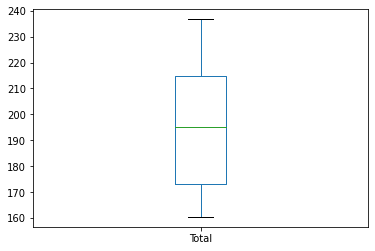

In [179]:
## Your code here

temp.plot(kind='box')

Misalkan kita ingin membandingkan genre musik terlaris di 5 negara teratas. Mari kita coba dengan mengisi terlebih dahulu kode yang rumpang (______) di bawah ini:
```
genre = pd.read_sql_query(
    '''
    SELECT 
    BillingCountry AS Country, ______.Name AS Genre 
    FROM ______ 
    LEFT JOIN invoice_items ON invoices.______ = invoice_items.______
    LEFT JOIN tracks ON invoice_items.______ = ______.______ 
    LEFT JOIN ______ ON tracks.______ = genres.______
    WHERE BillingCountry IN ('USA', 'Canada', 'France', 'Brazil', 'Germany')
    ''',conn)
```


In [180]:
## Your code here
genre = pd.read_sql_query(
                        '''
                        SELECT 
                        BillingCountry AS Country, genres.Name AS Genre 
                        FROM invoices 
                        LEFT JOIN invoice_items ON invoices.InvoiceId = invoice_items.invoiceId
                        LEFT JOIN tracks ON invoice_items.trackId = tracks.trackId 
                        LEFT JOIN genres ON tracks.genreId = genres.genreId
                        WHERE BillingCountry IN ('USA', 'Canada', 'France', 'Brazil', 'Germany')
                        ''', conn)
genre

,Country,Genre
0,Germany,Rock
1,Germany,Rock
2,Canada,Rock
3,Canada,Rock
4,Canada,Rock
...,...,...
1325,Canada,Rock
1326,Canada,Rock
1327,Canada,Rock
1328,Canada,Rock


Setelah Anda menyelesaikan query untuk dataframe `genre` di atas, salin dan jalankan kode di bawah ini untuk membuat diagram batang yang membandingkan genre lagu terlaris per negara.
```
genre.\
groupby(['Country','Genre']).size().reset_index(name = 'Total Bought').\
sort_values(['Country','Total Bought'], ascending=False).\
groupby('Country').head(5).\
pivot(index = 'Country', columns = 'Genre').plot(kind='bar',stacked=True).\
legend(bbox_to_anchor=(1, 1), loc=2) 
```
6. Genre apa yang **TIDAK** termasuk dalam genre terlaris di Jerman (Germany)?
   - [ ] Blues
   - [X] Jazz
   - [ ] Alternative & Punk
   - [ ] Latin

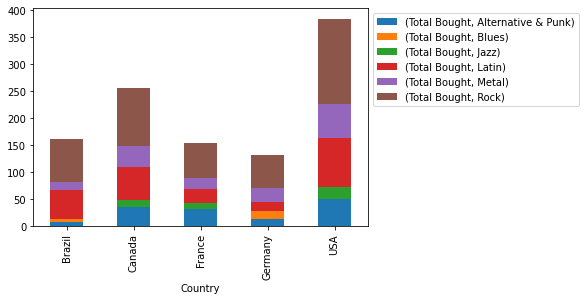

In [181]:
genre.\
groupby(['Country','Genre']).size().reset_index(name = 'Total Bought').\
sort_values(['Country','Total Bought'], ascending=False).\
groupby('Country').head(5).\
pivot(index = 'Country', columns = 'Genre').plot(kind='bar',stacked=True).\
legend(bbox_to_anchor=(1, 1), loc=2) 